In [2]:
import numpy as np
from matplotlib import pyplot as plt
import scipy.stats
import scipy.interpolate as interpolate
from scipy.interpolate import splev, splrep
from scipy.integrate import quad
import astropy
from astropy.visualization.hist import hist
from sklearn.neighbors import KernelDensity

In [3]:
sigma = [0.02, 2]
mean = 1
gauss_1 = scipy.stats.norm(loc = mean, scale=sigma[0])
gauss_2 = scipy.stats.norm(loc = mean, scale=sigma[1])
unif = scipy.stats.uniform()
chi = unif.rvs(1000)

masses_1 = np.abs(gauss_1.rvs(1000))
cdf_masses_1 = np.cumsum(np.sort(masses_1))/np.sum(np.sort(masses_1))
m_irr_1 = masses_1*np.sqrt((1+np.sqrt(1-chi**2))/2)

masses_2 = np.abs(gauss_2.rvs(1000))
cdf_masses_2 = np.cumsum(np.sort(masses_2))/np.sum(np.sort(masses_2))
m_irr_2= masses_2*np.sqrt((1+np.sqrt(1-chi**2))/2)

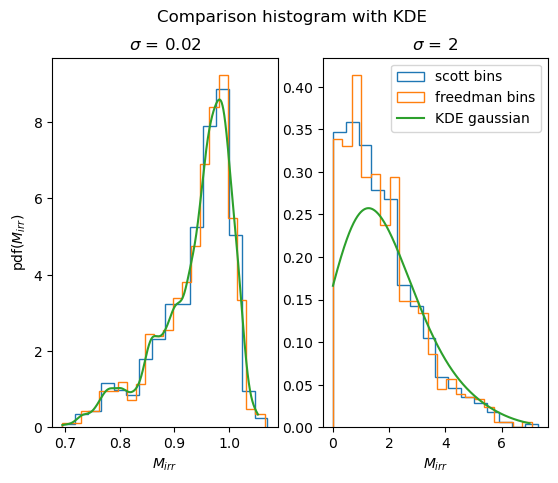

In [4]:
x_lin_1 = np.linspace(min(m_irr_1),max(m_irr_1), 1000)
fig, ax = plt.subplots(1,2)
hist(m_irr_1, bins = 'scott',density = True, histtype = 'step', label = 'scott bins', ax = ax[0])
hist(m_irr_1, bins = 'freedman', density = True, histtype = 'step', label = 'freedman bins', ax = ax[0])
kde = KernelDensity(kernel="gaussian", bandwidth=0.01).fit(m_irr_1[:, np.newaxis])
log_pdf = kde.score_samples(x_lin_1[:, np.newaxis])
ax[0].plot(x_lin_1, np.exp(log_pdf), label = 'KDE gaussian')
ax[0].set_xlabel(r'$M_{irr}$')
ax[0].set_ylabel(r'pdf($M_{irr}$)')
ax[0].set_title(r'$\sigma$ = ' +str(sigma[0]))

x_lin_2 = np.linspace(min(m_irr_2),max(m_irr_2), 1000)
hist(m_irr_2, bins = 'scott',density = True, histtype = 'step', label = 'scott bins', ax = ax[1])
hist(m_irr_2, bins = 'freedman', density = True, histtype = 'step', label = 'freedman bins', ax = ax[1])
kde = KernelDensity(kernel="gaussian", bandwidth=1).fit(m_irr_2[:, np.newaxis])
log_pdf = kde.score_samples(x_lin_2[:, np.newaxis])
ax[1].plot(x_lin_2, np.exp(log_pdf), label = 'KDE gaussian')
plt.xlabel(r'$M_{irr}$')
plt.legend()
ax[1].set_title(r'$\sigma$ = ' +str(sigma[1]))
plt.suptitle('Comparison histogram with KDE')
plt.show()

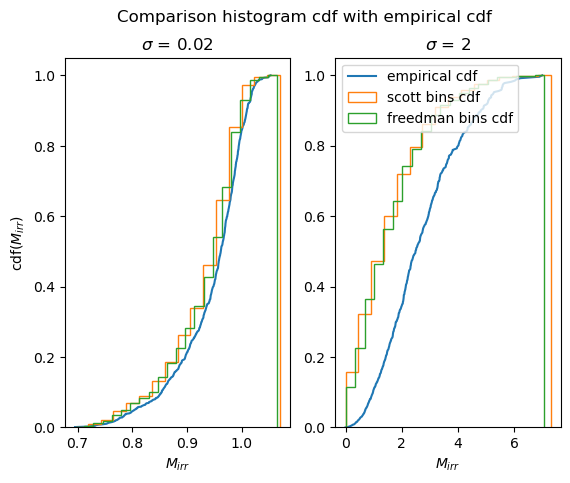

In [5]:
cdf_m_irr_1 = np.cumsum(np.sort(m_irr_1))/np.sum(m_irr_1)
cdf_m_irr_2 = np.cumsum(np.sort(m_irr_2))/np.sum(m_irr_2)

fig, ax = plt.subplots(1,2)

ax[0].plot(np.sort(m_irr_1),cdf_m_irr_1, label = 'empirical cdf')
hist(m_irr_1, bins = 'scott',density = True, histtype = 'step', label = 'scott bins cdf', cumulative = True, ax = ax[0])
hist(m_irr_1, bins = 'freedman', density = True, histtype = 'step', label = 'freedman bins cdf',cumulative = True, ax = ax[0])
ax[0].set_xlabel(r'$M_{irr}$')
ax[0].set_ylabel(r'cdf($M_{irr}$)')
ax[0].set_title(r'$\sigma$ = ' +str(sigma[0]))#plt.show()

ax[1].plot(np.sort(m_irr_2),cdf_m_irr_2, label = 'empirical cdf')
hist(m_irr_2, bins = 'scott',density = True, histtype = 'step', label = 'scott bins cdf', cumulative = True, ax = ax[1])
hist(m_irr_2, bins = 'freedman', density = True, histtype = 'step', label = 'freedman bins cdf',cumulative = True, ax = ax[1])
plt.legend()
plt.xlabel(r'$M_{irr}$')
#plt.ylabel(r'cdf($M_{irr}$)')
ax[1].set_title(r'$\sigma$ = ' +str(sigma[1]))
plt.suptitle('Comparison histogram cdf with empirical cdf')
plt.show()

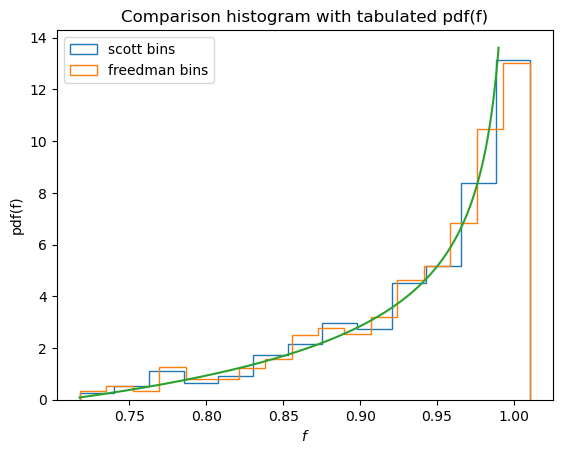

In [7]:
f = np.sqrt((1+np.sqrt(1-chi**2))/2) 
hist(f, bins = 'scott',density = True, histtype = 'step', label = 'scott bins')
hist(f, bins = 'freedman', density = True, histtype = 'step', label = 'freedman bins')

f_lin = np.linspace(min(f),0.99, 1000)
ax = plt.gca()
ax.plot(f_lin, 2*(2*f_lin**2-1)/(np.sqrt(1-f_lin**2)))
plt.xlabel(r'$f$')
plt.ylabel(r'pdf(f)')
plt.legend()
plt.title('Comparison histogram with tabulated pdf(f)')
plt.show()

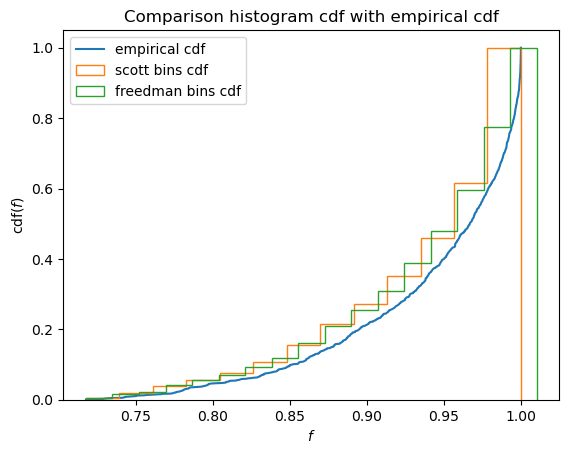

In [8]:
ax = plt.gca()
cdf_f = np.cumsum(np.sort(f))/np.sum(f)
plt.plot(np.sort(f),cdf_f, label = 'empirical cdf')
plt.hist(f, bins = 'scott',density = True, histtype = 'step', label = 'scott bins cdf', cumulative = True)
hist(f, bins = 'freedman', density = True, histtype = 'step', label = 'freedman bins cdf', cumulative = True)
plt.legend()
plt.xlabel(r'$f$')
plt.ylabel(r'cdf($f$)')
plt.title('Comparison histogram cdf with empirical cdf')
plt.show()

Caso con σ = 0.02:
KstestResult(statistic=0.01317936694021102, pvalue=0.9999952580562721, statistic_location=0.8795940253520488, statistic_sign=1)
Caso con σ = 2.00:
KstestResult(statistic=0.2805185185185185, pvalue=2.847892331120259e-07, statistic_location=0.46203568073239787, statistic_sign=1)


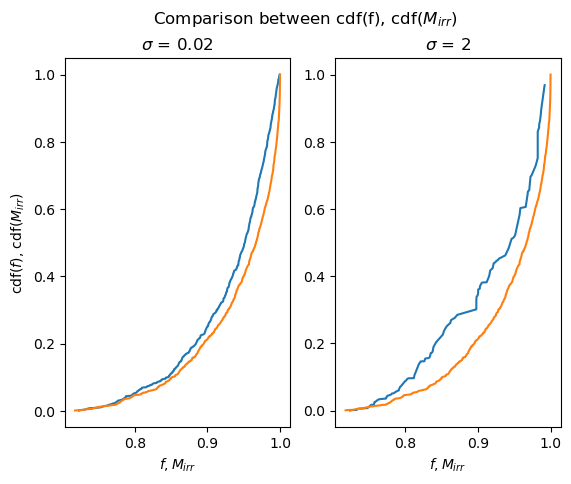

In [9]:
fig, ax = plt.subplots(1,2)

ax[0].plot(np.sort(m_irr_1[(m_irr_1 > min(f)) & (m_irr_1 < max(f))]),cdf_m_irr_1[(m_irr_1 > min(f)) & (m_irr_1 < max(f))], label = r'empirical cdf($M_{irr}$)')
ax[0].plot(np.sort(f),cdf_f, label = 'empirical cdf(f)')
ax[0].set_xlabel(r'$f, M_{irr}$')
ax[0].set_ylabel(r'cdf($f$), cdf($M_{irr}$)')
ax[0].set_title(r'$\sigma$ = ' +str(sigma[0]))

print('Caso con σ = %.02f:' %sigma[0])
print(scipy.stats.ks_2samp(cdf_m_irr_1[(m_irr_1 > min(f)) & (m_irr_1 < max(f))], cdf_f))

ax[1].plot(np.sort(m_irr_2[(m_irr_2 > min(f)) & (m_irr_2 < max(f))]),cdf_m_irr_2[(m_irr_2 > min(f)) & (m_irr_2 < max(f))], label = r'empirical cdf($M_{irr}$)')
ax[1].plot(np.sort(f),cdf_f, label = 'empirical cdf(f)')
ax[1].set_xlabel(r'$f, M_{irr}$')
ax[1].set_title(r'$\sigma$ = ' +str(sigma[1]))
plt.suptitle('Comparison between cdf(f), cdf($M_{irr})$')

print('Caso con σ = %.02f:' %sigma[1])
print(scipy.stats.ks_2samp(cdf_m_irr_2[(m_irr_2 > min(f)) & (m_irr_2 < max(f))], cdf_f))

Caso con σ = 0.02:
KstestResult(statistic=0.030516908212560385, pvalue=0.8536556206167697, statistic_location=0.2629353590672771, statistic_sign=1)
Caso con σ = 2.00:
KstestResult(statistic=0.0025515515515515514, pvalue=1.0, statistic_location=0.2534135884756979, statistic_sign=1)


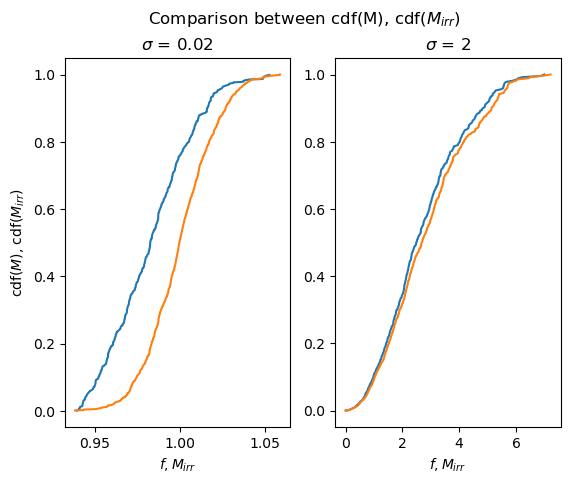

In [10]:
fig, ax = plt.subplots(1,2)

ax[0].plot(np.sort(m_irr_1[(m_irr_1 > min(masses_1)) & (m_irr_1 < max(masses_1))]),cdf_m_irr_1[(m_irr_1 > min(masses_1)) & (m_irr_1 < max(masses_1))], label = r'empirical cdf($M_{irr}$)')
ax[0].plot(np.sort(masses_1),cdf_masses_1, label = 'empirical cdf(M)')
ax[0].set_xlabel(r'$f, M_{irr}$')
ax[0].set_ylabel(r'cdf($M$), cdf($M_{irr}$)')
ax[0].set_title(r'$\sigma$ = ' +str(sigma[0]))

print('Caso con σ = %.02f:' %sigma[0])
print(scipy.stats.ks_2samp(cdf_m_irr_1[(m_irr_1 > min(masses_1)) & (m_irr_1 < max(masses_1))], cdf_masses_1))

ax[1].plot(np.sort(m_irr_2[(m_irr_2 > min(masses_2)) & (m_irr_2 < max(masses_2))]),cdf_m_irr_2[(m_irr_2 > min(masses_2)) & (m_irr_2 < max(masses_2))], label = r'empirical cdf($M_{irr}$)')
ax[1].plot(np.sort(masses_2),cdf_masses_2, label = 'empirical cdf(M)')
ax[1].set_xlabel(r'$f, M_{irr}$')
ax[1].set_title(r'$\sigma$ = ' +str(sigma[1]))
plt.suptitle('Comparison between cdf(M), cdf($M_{irr})$')
print('Caso con σ = %.02f:' %sigma[1])
print(scipy.stats.ks_2samp(cdf_m_irr_2[(m_irr_2 > min(masses_2)) & (m_irr_2 < max(masses_2))], cdf_masses_2))


In [11]:
def probability(irr_m, s, mu):
    constant = np.sqrt(2/np.pi)/s
    p_value = scipy.integrate.quad(lambda x: np.exp(- (irr_m/x-mu)**2/(2*s**2))*(2*x**2-1)/(x*np.sqrt(1-x**2)), 1/np.sqrt(2), 1)[0]
    return constant*p_value

p_x_1 = []
for x in x_lin_1:
    p_x_1.append(probability(x, sigma[0], mean))

p_x_2 = []
for x in x_lin_2:
    p_x_2.append(probability(x, sigma[1], mean))

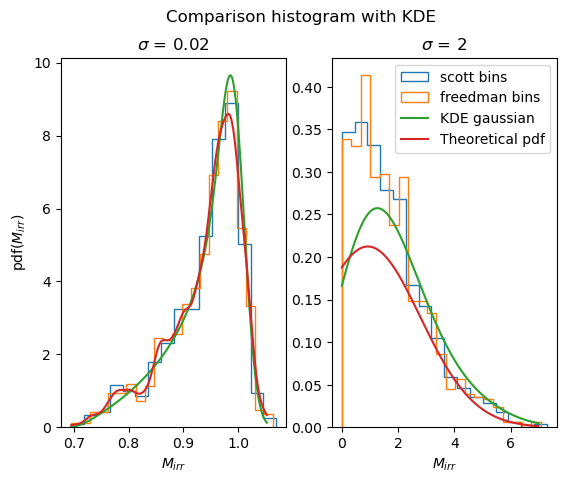

In [12]:
x_lin_1 = np.linspace(min(m_irr_1),max(m_irr_1), 1000)
fig, ax = plt.subplots(1,2)
hist(m_irr_1, bins = 'scott',density = True, histtype = 'step', label = 'scott bins', ax = ax[0])
hist(m_irr_1, bins = 'freedman', density = True, histtype = 'step', label = 'freedman bins', ax = ax[0])
kde = KernelDensity(kernel="gaussian", bandwidth=0.01).fit(m_irr_1[:, np.newaxis])
log_pdf = kde.score_samples(x_lin_1[:, np.newaxis])
ax[0].plot(x_lin_1, p_x_1, label = 'Theoretical pdf')
ax[0].plot(x_lin_1, np.exp(log_pdf), label = 'KDE gaussian')
ax[0].set_xlabel(r'$M_{irr}$')
ax[0].set_ylabel(r'pdf($M_{irr}$)')
ax[0].set_title(r'$\sigma$ = ' +str(sigma[0]))

x_lin_2 = np.linspace(min(m_irr_2),max(m_irr_2), 1000)
hist(m_irr_2, bins = 'scott',density = True, histtype = 'step', label = 'scott bins', ax = ax[1])
hist(m_irr_2, bins = 'freedman', density = True, histtype = 'step', label = 'freedman bins', ax = ax[1])
kde = KernelDensity(kernel="gaussian", bandwidth=1).fit(m_irr_2[:, np.newaxis])
log_pdf = kde.score_samples(x_lin_2[:, np.newaxis])
ax[1].plot(x_lin_2, np.exp(log_pdf), label = 'KDE gaussian')
ax[1].plot(x_lin_2, p_x_2, label = 'Theoretical pdf')
plt.xlabel(r'$M_{irr}$')
plt.legend()
ax[1].set_title(r'$\sigma$ = ' +str(sigma[1]))
plt.suptitle('Comparison histogram with KDE')
plt.show()

In [13]:
sigma_x = np.linspace(0.02, 2,7)
unif = scipy.stats.uniform()
chi = unif.rvs(1000)

for sigma in sigma_x:
    gauss = scipy.stats.norm(loc = 1, scale=sigma)
    masses = np.abs(gauss.rvs(1000))
    cdf_masses = np.cumsum(np.sort(masses))/np.sum(np.sort(masses))
    m_irr = masses*np.sqrt((1+np.sqrt(1-chi**2))/2)
    cdf_m_irr = np.cumsum(np.sort(m_irr))/np.sum(np.sort(m_irr))
    f = np.sqrt((1+np.sqrt(1-chi**2))/2) 
    cdf_f = np.cumsum(np.sort(f))/np.sum(f)
    print('σ = %.02f' %sigma)
    print('p-value with f: ', scipy.stats.ks_2samp(cdf_m_irr[(m_irr > min(f)) & (m_irr < max(f))], cdf_f).pvalue)
    print('p-value with M: ', scipy.stats.ks_2samp(cdf_m_irr[(m_irr > min(masses)) & (m_irr < max(masses))], cdf_masses).pvalue)

σ = 0.02
p-value with f:  1.0
p-value with M:  0.9958961544837557
σ = 0.35
p-value with f:  0.00030205398979851864
p-value with M:  1.0
σ = 0.68
p-value with f:  2.562878240044856e-05
p-value with M:  1.0
σ = 1.01
p-value with f:  2.922658771826178e-10
p-value with M:  1.0
σ = 1.34
p-value with f:  1.5118101843293518e-08
p-value with M:  1.0
σ = 1.67
p-value with f:  6.60552022971107e-11
p-value with M:  1.0
σ = 2.00
p-value with f:  4.380614399954471e-09
p-value with M:  1.0
